# Ora faccio il grafico generale dell'Italia

In [1]:
import numpy as np
import pandas as pd

import geopandas as gpd
import contextily as ctx

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import esda

from pysal.lib import  weights

from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation, plot_moran
from splot.libpysal import plot_spatial_weights

In [3]:
Reg = gpd.read_file("data/regioni_db/regioni.shp")
Reg.head(2)

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,persone,n_menzione,n_bronzo,n_argento,n_oro,n_medaglie,r_menzione,r_bronzo,r_argento,r_oro,r_medaglie,pos_media,pos_median,geometry
0,1,1,Piemonte,1.234644e+06,2.539164e+10,414,81,100,82,35,217,0.195652,0.241546,0.198068,0.084541,0.524155,138.094203,131.0,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
1,1,2,Valle d'Aosta,3.111871e+05,3.258608e+09,16,5,0,3,0,3,0.312500,0.000000,0.187500,0.000000,0.187500,176.812500,168.0,"POLYGON ((390652.643 5091766.170, 390748.643 5..."


In [4]:
w = weights.Queen.from_dataframe(Reg, ids="DEN_REG")
w

C:\Users\micbe\AppData\Roaming\Python\Python312\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: Sicilia, Sardegna.
  W.__init__(self, neighbors, ids=ids, **kw)


In [5]:
w["Friuli-Venezia Giulia"]["Veneto"]

1.0

In [6]:
Reg = Reg.set_index("DEN_REG", drop=False)
Reg.tail(2)

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,persone,n_menzione,n_bronzo,n_argento,n_oro,n_medaglie,r_menzione,r_bronzo,r_argento,r_oro,r_medaglie,pos_media,pos_median,geometry
DEN_REG,,,,,,,,,,,,,,,,,,,
Sicilia,5,19,Sicilia,1.344688e+06,2.582432e+10,330,68,68,28,13,109,0.206061,0.206061,0.084848,0.039394,0.330303,178.427273,193.0,"MULTIPOLYGON (((822901.365 3935306.722, 822879..."
Sardegna,5,20,Sardegna,1.449231e+06,2.410630e+10,108,25,22,7,3,32,0.231481,0.203704,0.064815,0.027778,0.296296,180.916667,187.0,"MULTIPOLYGON (((448813.649 4301762.750, 448823..."


In [7]:
RegNoIsla = Reg.drop(w.islands)
RegNoIsla.tail(2)

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,persone,n_menzione,n_bronzo,n_argento,n_oro,n_medaglie,r_menzione,r_bronzo,r_argento,r_oro,r_medaglie,pos_media,pos_median,geometry
DEN_REG,,,,,,,,,,,,,,,,,,,
Basilicata,4,17,Basilicata,613038.362707,1.007159e+10,43,12,6,2,1,9,0.279070,0.139535,0.046512,0.023256,0.209302,201.813953,218.0,"MULTIPOLYGON (((1073707.061 4445700.105, 10737..."
Calabria,4,18,Calabria,847415.624343,1.521265e+10,130,28,14,5,2,21,0.215385,0.107692,0.038462,0.015385,0.161538,213.623077,230.0,"MULTIPOLYGON (((1083358.846 4416348.740, 10833..."


In [8]:
# Ricalcolo senza le isole
wNoIsla = weights.Queen.from_dataframe(RegNoIsla, ids="DEN_REG")
wNoIsla["Lombardia"]

{'Piemonte': 1.0,
 'Veneto': 1.0,
 'Emilia-Romagna': 1.0,
 'Trentino-Alto Adige': 1.0}

In [9]:
# righe matrice somma 1
wNoIsla.transform = "R"

In [10]:
w.transform = "O"

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

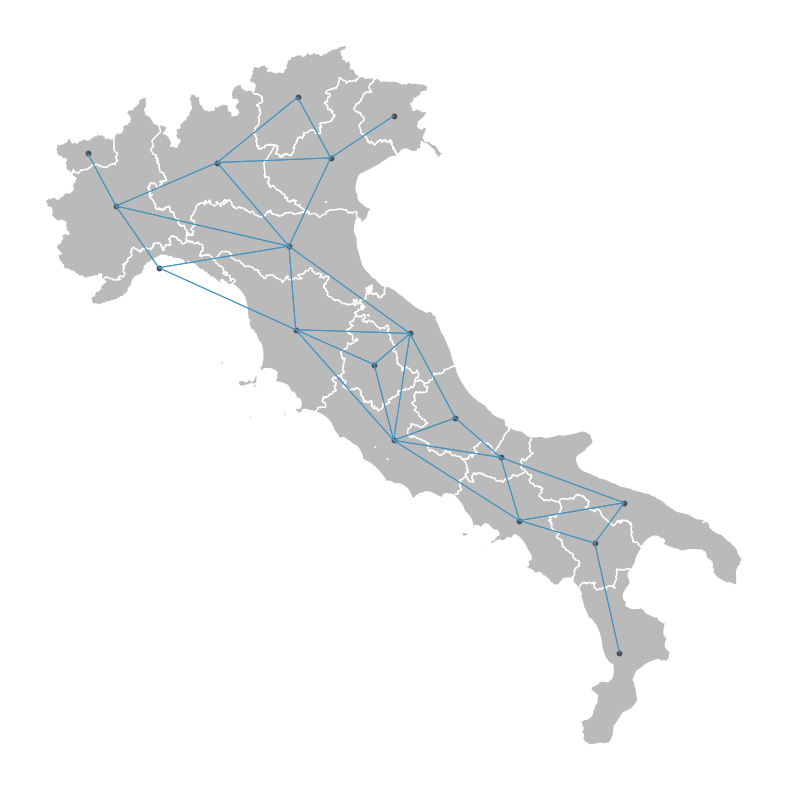

In [11]:
#plot_spatial_weights(w, Reg, indexed_on="DEN_REG")
plot_spatial_weights(wNoIsla, RegNoIsla, indexed_on="DEN_REG")

In [12]:
# Questa e' la media dei vicini
RegNoIsla["w_r_med"] = weights.lag_spatial(wNoIsla, RegNoIsla["r_medaglie"])
RegNoIsla.head(2)

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,persone,n_menzione,n_bronzo,n_argento,n_oro,n_medaglie,r_menzione,r_bronzo,r_argento,r_oro,r_medaglie,pos_media,pos_median,geometry,w_r_med
DEN_REG,,,,,,,,,,,,,,,,,,,,
Piemonte,1,1,Piemonte,1.234644e+06,2.539164e+10,414,81,100,82,35,217,0.195652,0.241546,0.198068,0.084541,0.524155,138.094203,131.0,"POLYGON ((457749.464 5145501.795, 458662.395 5...",0.453314
Valle d'Aosta,1,2,Valle d'Aosta,3.111871e+05,3.258608e+09,16,5,0,3,0,3,0.312500,0.000000,0.187500,0.000000,0.187500,176.812500,168.0,"POLYGON ((390652.643 5091766.170, 390748.643 5...",0.524155


In [13]:
# standardizziamo i valori
RegNoIsla["r_medaglie_std"] = ( RegNoIsla["r_medaglie"] - RegNoIsla["r_medaglie"].mean() ) / RegNoIsla["r_medaglie"].std()
RegNoIsla["w_r_medaglie_std"] = weights.lag_spatial(wNoIsla, RegNoIsla["r_medaglie_std"])
RegNoIsla

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,persone,n_menzione,n_bronzo,n_argento,n_oro,...,r_bronzo,r_argento,r_oro,r_medaglie,pos_media,pos_median,geometry,w_r_med,r_medaglie_std,w_r_medaglie_std
DEN_REG,,,,,,,,,,,,,,,,,,,,,
Piemonte,1,1,Piemonte,1.234644e+06,2.539164e+10,414,81,100,82,35,...,0.241546,0.198068,0.084541,0.524155,138.094203,131.0,"POLYGON ((457749.464 5145501.795, 458662.395 5...",0.453314,0.590769,0.089670
Valle d'Aosta,1,2,Valle d'Aosta,3.111871e+05,3.258608e+09,16,5,0,3,0,...,0.000000,0.187500,0.000000,0.187500,176.812500,168.0,"POLYGON ((390652.643 5091766.170, 390748.643 5...",0.524155,-1.790590,0.590769
Lombardia,1,3,Lombardia,1.411360e+06,2.386287e+10,695,104,183,157,81,...,0.263309,0.225899,0.116547,0.605755,122.941007,110.0,"MULTIPOLYGON (((485536.498 4985444.636, 485366...",0.530140,1.167980,0.633110
Trentino-Alto Adige,2,4,Trentino-Alto Adige,8.007317e+05,1.360596e+10,121,25,22,30,9,...,0.181818,0.247934,0.074380,0.504132,138.355372,133.0,"POLYGON ((743273.909 5219762.939, 743387.812 5...",0.599015,0.449139,1.120301
Veneto,2,5,Veneto,1.056504e+06,1.835149e+10,466,87,122,95,59,...,0.261803,0.203863,0.126609,0.592275,120.611588,113.0,"POLYGON ((768135.209 5175357.497, 768136.788 5...",0.563094,1.072623,0.866208
Friuli-Venezia Giulia,2,6,Friuli-Venezia Giulia,6.593411e+05,7.936834e+09,193,28,57,40,27,...,0.295337,0.207254,0.139896,0.642487,116.746114,105.0,"MULTIPOLYGON (((871036.678 5066768.855, 871032...",0.592275,1.427805,1.072623
Liguria,1,7,Liguria,8.219165e+05,5.417714e+09,150,28,40,29,9,...,0.266667,0.193333,0.060000,0.520000,142.046667,133.5,"MULTIPOLYGON (((568227.844 4874810.869, 568220...",0.516028,0.561381,0.533285
Emilia-Romagna,2,8,Emilia-Romagna,1.176992e+06,2.250182e+10,382,94,96,73,22,...,0.251309,0.191099,0.057592,0.500000,139.455497,134.0,"MULTIPOLYGON (((618343.929 4893985.660, 618335...",0.521243,0.419909,0.570174
Toscana,3,9,Toscana,1.304650e+06,2.298501e+10,397,75,102,73,33,...,0.256927,0.183879,0.083123,0.523929,138.886650,133.0,"MULTIPOLYGON (((674479.640 4680664.861, 674610...",0.464984,0.589176,0.172220


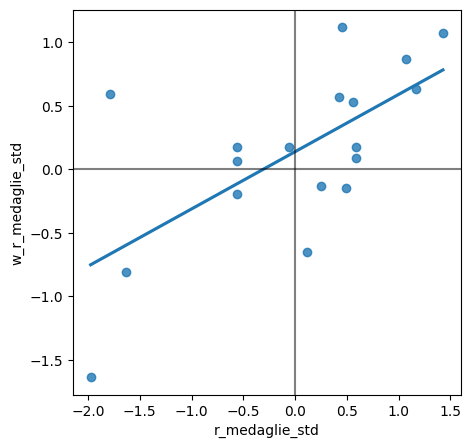

In [14]:
# Plot di Moran

# asse x ho il valore di una regione e sulla y la media dei vicini (chiamato lag spaziale). il tutto normalizzato

fig, ax = plt.subplots(1, figsize=(5, 5))
sns.regplot(x="r_medaglie_std", y="w_r_medaglie_std", data=RegNoIsla, ci=None)
plt.axvline(0, color="Black", alpha=0.5)
plt.axhline(0, color="Black", alpha=0.5);

In [15]:
# Indice I di Moran

mi = esda.Moran(RegNoIsla["r_medaglie"], wNoIsla)
mi.I

0.4510888416399974

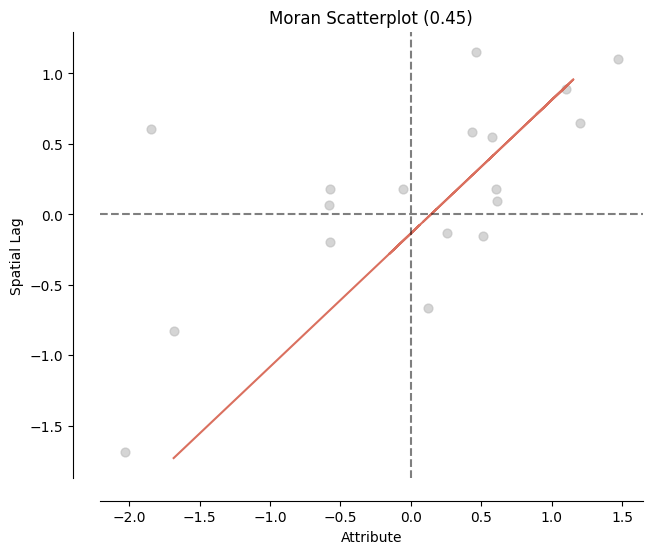

In [16]:
moran_scatterplot(mi);

In [17]:
# credo voglia dire che 0.5% di probabilità che il pattern sia casuale
mi.p_sim

0.003

In [18]:
# Creiamo lisa (indicatore locale di aggregazione spaziale)
lisa = esda.Moran_Local(RegNoIsla["r_medaglie"], wNoIsla, permutations=5000, seed=126)

In [19]:
# dividiamo le osservazionei in base al p-value per la significatività
RegNoIsla["signif"] = lisa.p_sim < 0.4

# diciamo in che quadrante sta
RegNoIsla["quadrante"] = lisa.q

RegNoIsla

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,persone,n_menzione,n_bronzo,n_argento,n_oro,...,r_oro,r_medaglie,pos_media,pos_median,geometry,w_r_med,r_medaglie_std,w_r_medaglie_std,signif,quadrante
DEN_REG,,,,,,,,,,,,,,,,,,,,,
Piemonte,1,1,Piemonte,1.234644e+06,2.539164e+10,414,81,100,82,35,...,0.084541,0.524155,138.094203,131.0,"POLYGON ((457749.464 5145501.795, 458662.395 5...",0.453314,0.590769,0.089670,False,1
Valle d'Aosta,1,2,Valle d'Aosta,3.111871e+05,3.258608e+09,16,5,0,3,0,...,0.000000,0.187500,176.812500,168.0,"POLYGON ((390652.643 5091766.170, 390748.643 5...",0.524155,-1.790590,0.590769,True,2
Lombardia,1,3,Lombardia,1.411360e+06,2.386287e+10,695,104,183,157,81,...,0.116547,0.605755,122.941007,110.0,"MULTIPOLYGON (((485536.498 4985444.636, 485366...",0.530140,1.167980,0.633110,True,1
Trentino-Alto Adige,2,4,Trentino-Alto Adige,8.007317e+05,1.360596e+10,121,25,22,30,9,...,0.074380,0.504132,138.355372,133.0,"POLYGON ((743273.909 5219762.939, 743387.812 5...",0.599015,0.449139,1.120301,True,1
Veneto,2,5,Veneto,1.056504e+06,1.835149e+10,466,87,122,95,59,...,0.126609,0.592275,120.611588,113.0,"POLYGON ((768135.209 5175357.497, 768136.788 5...",0.563094,1.072623,0.866208,True,1
Friuli-Venezia Giulia,2,6,Friuli-Venezia Giulia,6.593411e+05,7.936834e+09,193,28,57,40,27,...,0.139896,0.642487,116.746114,105.0,"MULTIPOLYGON (((871036.678 5066768.855, 871032...",0.592275,1.427805,1.072623,True,1
Liguria,1,7,Liguria,8.219165e+05,5.417714e+09,150,28,40,29,9,...,0.060000,0.520000,142.046667,133.5,"MULTIPOLYGON (((568227.844 4874810.869, 568220...",0.516028,0.561381,0.533285,True,1
Emilia-Romagna,2,8,Emilia-Romagna,1.176992e+06,2.250182e+10,382,94,96,73,22,...,0.057592,0.500000,139.455497,134.0,"MULTIPOLYGON (((618343.929 4893985.660, 618335...",0.521243,0.419909,0.570174,True,1
Toscana,3,9,Toscana,1.304650e+06,2.298501e+10,397,75,102,73,33,...,0.083123,0.523929,138.886650,133.0,"MULTIPOLYGON (((674479.640 4680664.861, 674610...",0.464984,0.589176,0.172220,True,1


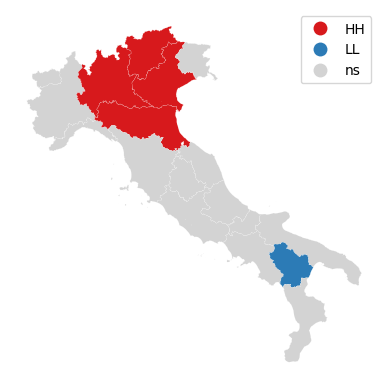

In [20]:
lisa_cluster(lisa, RegNoIsla);

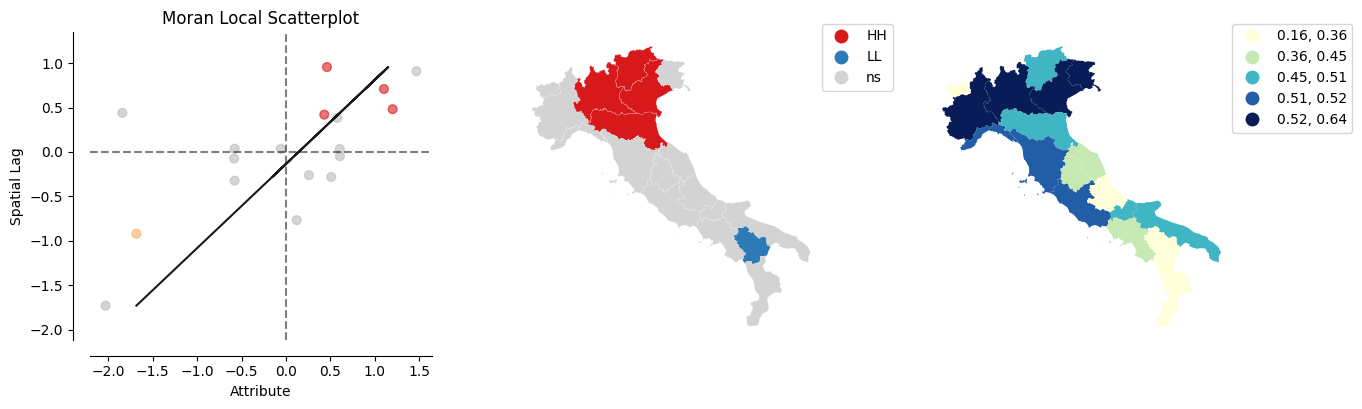

In [21]:
plot_local_autocorrelation(lisa, RegNoIsla, "r_medaglie");

In [22]:
lisa.p_sim

array([0.41031794, 0.16976605, 0.03759248, 0.02239552, 0.00519896,
       0.11557688, 0.15756849, 0.03479304, 0.30833833, 0.3925215 ,
       0.36432713, 0.36552689, 0.49830034, 0.40471906, 0.30233953,
       0.12817437, 0.0389922 , 0.05818836])

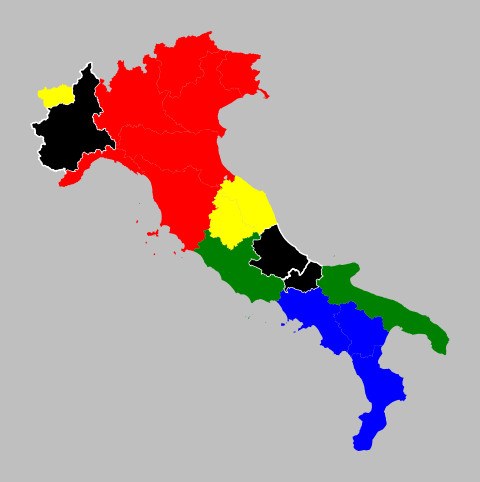

In [23]:
fig, ax = plt.subplots(1, figsize=(6, 6))

ns = RegNoIsla.loc[RegNoIsla["signif"]==False, "geometry"]
ns.plot(ax=ax, color="k", label="ns", edgecolor="w")

hh = RegNoIsla.loc[ (RegNoIsla["quadrante"]==1) & (RegNoIsla["signif"]==True), "geometry"]
hh.plot(ax=ax, color="r", label="hh")

ll = RegNoIsla.loc[ (RegNoIsla["quadrante"]==3) & (RegNoIsla["signif"]==True), "geometry"]
ll.plot(ax=ax, color="b", label="ll")

lh = RegNoIsla.loc[ (RegNoIsla["quadrante"]==2) & (RegNoIsla["signif"]==True), "geometry"]
lh.plot(ax=ax, color="yellow", label="lh")

hl = RegNoIsla.loc[ (RegNoIsla["quadrante"]==4) & (RegNoIsla["signif"]==True), "geometry"]
hl.plot(ax=ax, color="green", label="hl")

#f.suptitle("titolo generale", size=30)
#ax.legend()
fig.set_facecolor("0.75")
ax.set_axis_off();

In [24]:
lisaTest = esda.Moran_Local(RegNoIsla["r_medaglie"], wNoIsla, permutations=10000)
lisaTest.p_sim - lisa.p_sim

array([ 1.24090770e-03,  1.43155451e-02,  6.30312894e-03,  3.00193936e-03,
       -9.94701570e-05,  3.61119657e-03,  3.71538531e-03,  2.20325898e-03,
        4.43039079e-03, -1.86056179e-03,  6.03582913e-03, -1.06623811e-02,
       -1.55001496e-03, -4.15911218e-03, -3.16944910e-03, -5.78660390e-03,
       -2.69583120e-03,  2.10560828e-03])